# Video Classification

## Model Evaluation

In [13]:
%load_ext autoreload
%autoreload 2
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.models import load_model

from utils.utils import load_config
from utils.utils import predict_from_folder
from scripts.video_data_generator import VideoDataGenerator


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Experiment settings

Set here the two variables in the following way:

- **CONFIG_YML:** assign the path to the config.yml file used for the experiment you want to evaluate
- **WEIGHTS:** assign the path to the model weights (.h5 file) you want to evaluate


In [5]:
experiments ={
    0:["../experiments/experiment_0/experiment0_GRU.yml","../experiments/experiment_0/model.02-2.1634.h5"],
    1:["../experiments/experiment_1/experiment1_LSTM.yml","../experiments/experiment_1/model.04-2.1393.h5"],
    2:["../experiments/experiment_2/experiment2_LSTM_NoReg_Move.yml","../experiments/experiment_2/model.04-2.1352.h5"],
    3:["../experiments/experiment_3/experiment3_LSTM_data_aug.yml","../experiments/experiment_3/model.09-0.5953.h5"],
    4:["../experiments/experiment_4/experiment4_LSTM_CNN.yml","../experiments/experiment_4/model.07-0.5929.h5"]
}
CONFIG_YML, WEIGHTS = experiments[0]
config = load_config(CONFIG_YML)
config

{'data': {'directory': 'movie-shot-trailers/trailer',
  'batch_size': 2,
  'df_pickle_path': 'v1_split_trailer.pkl',
  'file2read': 'video',
  'df_file_column': 'path',
  'y_scale': 'scale_lab',
  'y_move': 'move_lab',
  'max_frames': 16,
  'image_size': [224, 224],
  'random_state': 42},
 'model': {'weights': 'imagenet',
  'X3_dropout_rate': 0.0,
  'rnn_type': 'gru',
  'rnn_units': 128,
  'X4_dropout_rate': 0.0,
  'scale_classes': 5,
  'move_classes': 4},
 'compile': {'optimizer': {'adam': {'learning_rate': 0.001}},
  'loss': {'outputs_scale': 'categorical_crossentropy',
   'outputs_move': 'categorical_crossentropy'},
  'loss_weights': {'outputs_scale': 1, 'outputs_move': 2.5},
  'metrics': {'outputs_scale': ['accuracy'],
   'outputs_move': {'f1_score': {'threshold': 0.5}}}},
 'freeze': {'X2_cnn_tdist': False,
  'X4_model_rnn': True,
  'outputs_scale': True,
  'outputs_move': True},
 'fit': {'epochs': 100,
  'callbacks': {'model_checkpoint': {'filepath': '/home/app/src/experiments/exp

## Load model


In [6]:
model = load_model(WEIGHTS)
model.summary()

2022-12-22 18:22:49.494018: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-22 18:22:49.540593: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-22 18:22:49.541532: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-22 18:22:49.544433: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_l (InputLayer)           [(None, 16, 224, 22  0           []                               
                                4, 3)]                                                            
                                                                                                  
 tf.__operators__.getitem (Slic  (None, 16, 224, 224  0          ['input_l[0][0]']                
 ingOpLambda)                   , 3)                                                              
                                                                                                  
 tf.nn.bias_add (TFOpLambda)    (None, 16, 224, 224  0           ['tf.__operators__.getitem[0][0]'
                                , 3)                             ]                            

## Get predictions from testing dataset

In [7]:
# (!) Don't touch this cell, will use the loaded model and
#     the function utils.predict_from_folder() to get 
#     model predictions and the corresponding true labels
#     so we can measure the accuracy
test_df = pd.read_csv(config['data']['test_csv_directory'])
test_df['scene_fullpath'] = '../' + test_df['scene_fullpath']
test_df = test_df[test_df.scene_movement_label!='Multi_movement']
scale_classes = pd.factorize(test_df['scene_scale_label'])[1]
move_classes = pd.factorize(test_df['scene_movement_label'])[1]

test_data_gen = VideoDataGenerator(
        df = test_df,
        file_col= config['data']['file_col'],
        batch_size = config['data']['batch_size'],
        shuffle = False,
        y_col_scale= config['data']['y_col_scale'],
        y_col_movement= config['data']['y_col_movement'],
        mapping_scale= config['data']['mapping_scale'],
        mapping_movement= config['data']['mapping_movement'],
        max_frames= config['data']['max_frames'],
        img_size= config['data']['image_size'],
        augmentation_seq = False
    )

scale_preds,scale_tests, move_preds, move_tests = predict_from_folder(model, test_data_gen, scale_classes,move_classes)



2022-12-22 18:25:16.633034: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8200
2022-12-22 18:25:17.567653: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-22 18:25:17.570759: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-22 18:25:17.570862: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-12-22 18:25:17.572040: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-22 18:25:17.572213: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


In [ ]:
# Save get_predictions.predict_labels to pickle and class names RUN ONCE!
predictions_names_list = [scale_preds,scale_tests, move_preds, move_tests, scale_classes, move_classes]
with open('../experiments/experiment_1/predictions_classnames_list.pkl', 'wb') as f:
    pickle.dump(predictions_names_list, f)

In [ ]:
#Load get_predictions.predict_list.pkl to get the stored predictions and class names
with open('../experiments/experiment_1/predictions_classnames_list.pkl', 'rb') as f:
    get_predictions_classnames_list = pickle.load(f)

In [18]:
# Scale report
print(classification_report(y_true = get_predictions_classnames_list[1], y_pred = get_predictions_classnames_list[0], digits=4))


              precision    recall  f1-score   support

    scale_CS     0.7712    0.8392    0.8037      1791
   scale_ECS     0.8756    0.8564    0.8659      1636
    scale_FS     0.8533    0.8444    0.8488      1632
    scale_LS     0.9187    0.9146    0.9166      1346
    scale_MS     0.8248    0.7780    0.8007      1743

    accuracy                         0.8430      8148
   macro avg     0.8487    0.8465    0.8471      8148
weighted avg     0.8444    0.8430    0.8432      8148



In [71]:
# confusion matrix
def plot_confusion_matrix(actual, predicted, labels, ds_type):
  cm = confusion_matrix(actual, predicted , normalize='pred')
  ax = sns.heatmap(cm, annot=True, fmt='g')
  sns.set(rc={'figure.figsize':(12, 12)})
  sns.set(font_scale=1.4)
  ax.set_title('Confusion matrix of ' + ds_type)
  ax.set_xlabel('Predicted')
  ax.set_ylabel('Actual')
  plt.xticks(rotation=90)
  plt.yticks(rotation=0)
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

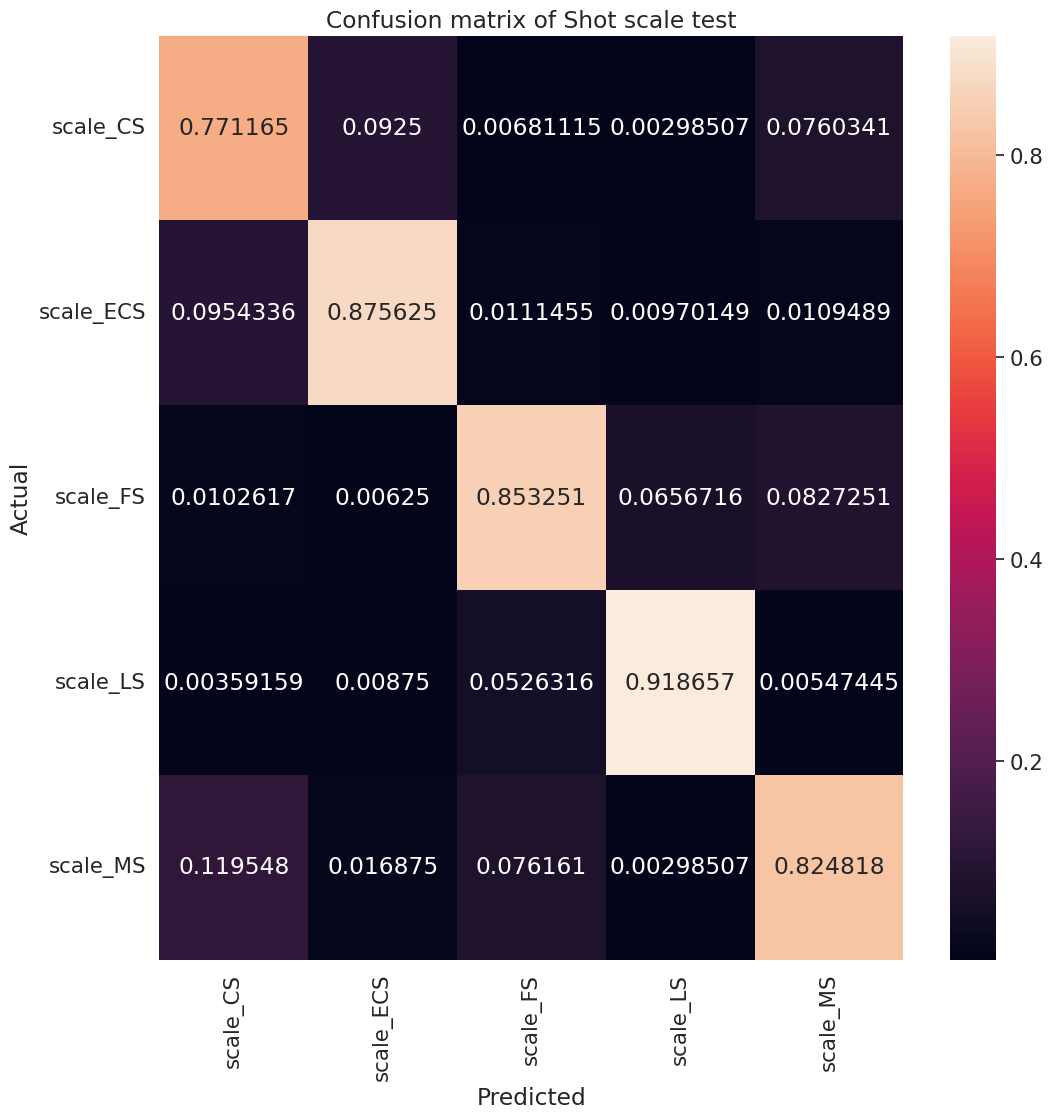

In [72]:
plot_confusion_matrix(actual = get_predictions_classnames_list[1], predicted= get_predictions_classnames_list[0], labels= get_predictions_classnames_list[4], ds_type='Shot scale test')

In [73]:
# Move report
print(classification_report(y_true = get_predictions_classnames_list[3], y_pred= get_predictions_classnames_list[2], digits=4))

              precision    recall  f1-score   support

 move_Motion     0.5659    0.3891    0.4611      2385
   move_Pull     0.0000    0.0000    0.0000        80
   move_Push     0.0000    0.0000    0.0000       220
 move_Static     0.7426    0.8847    0.8075      5463

    accuracy                         0.7070      8148
   macro avg     0.3271    0.3184    0.3171      8148
weighted avg     0.6635    0.7070    0.6763      8148



/home/app/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/app/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/app/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


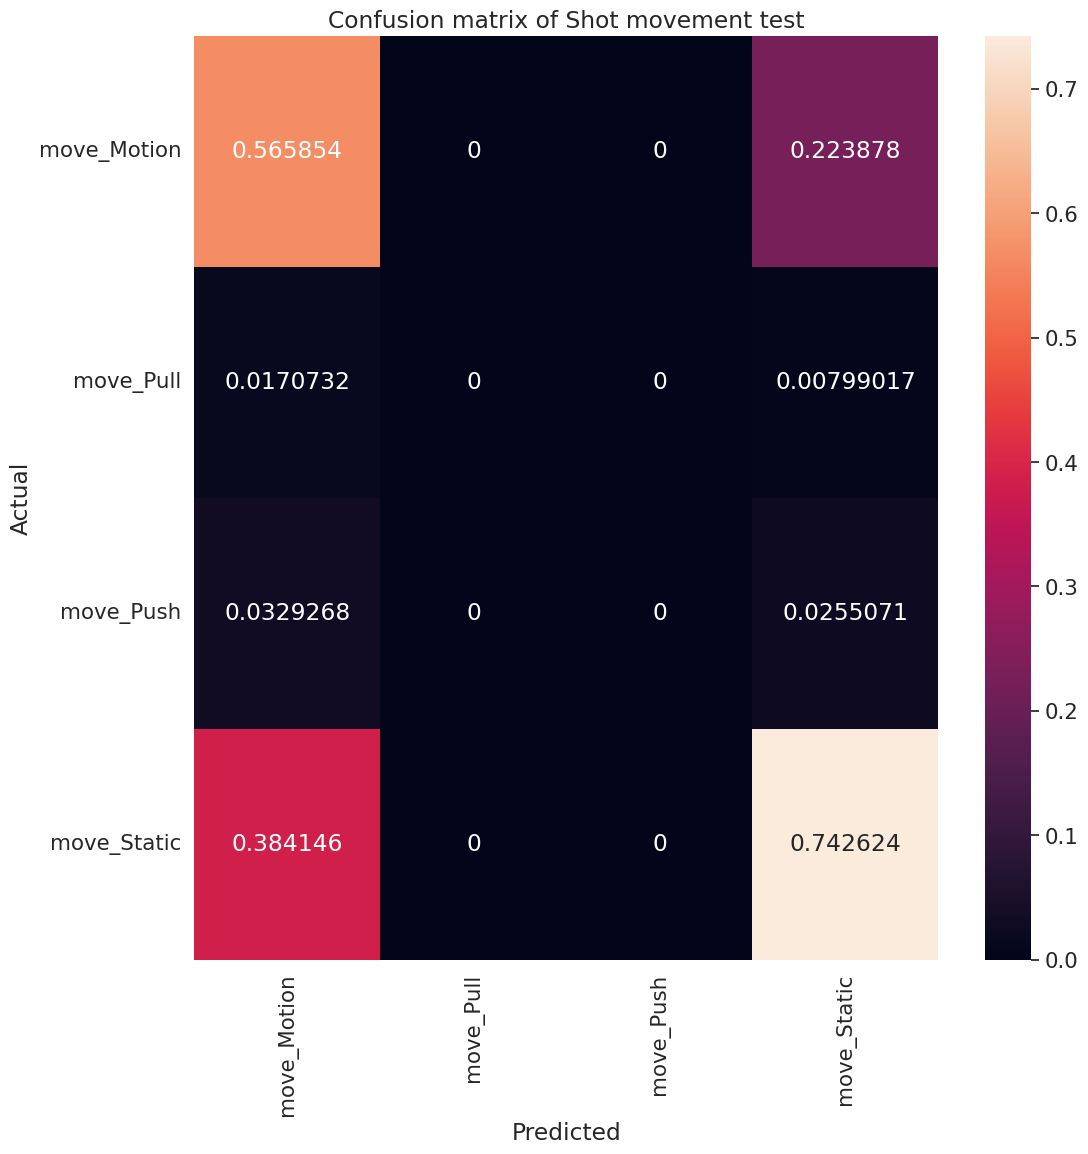

In [74]:
plot_confusion_matrix(actual = get_predictions_classnames_list[3], predicted = get_predictions_classnames_list[2], labels= get_predictions_classnames_list[5], ds_type ='Shot movement test')